<a href="https://colab.research.google.com/github/alik604/cyber-security/blob/master/anomalyDetection/SPX_500_Anomaly_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stock Anomaly Detection Notebook

list of sources 
* https://github.com/edyoda/data-science-complete-tutorial/blob/master/13.%20Anomaly%20Detection.ipynb



In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

# !pip install yfinance
import yfinance as yf # https://github.com/ranaroussi/yfinance

from sklearn.cluster import KMeans
from sklearn.ensemble import IsolationForest

%config IPCompleter.greedy=True

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
SPY = yf.Ticker("spy")
SPY = SPY.history(period='20y') # max
SPY_open = pd.DataFrame({'close':SPY["Close"]})
# SPY_open.head(10)
SPY_open.tail(10)

c:\Users\alik604\AppData\Local\Programs\Python\Python39\lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


,close
Date,
2024-02-01 00:00:00-05:00,489.200012
2024-02-02 00:00:00-05:00,494.350006
2024-02-05 00:00:00-05:00,492.549988
2024-02-06 00:00:00-05:00,493.980011
2024-02-07 00:00:00-05:00,498.100006
2024-02-08 00:00:00-05:00,498.320007
2024-02-09 00:00:00-05:00,501.200012
2024-02-12 00:00:00-05:00,500.980011
2024-02-13 00:00:00-05:00,494.079987


<Axes: xlabel='Date'>

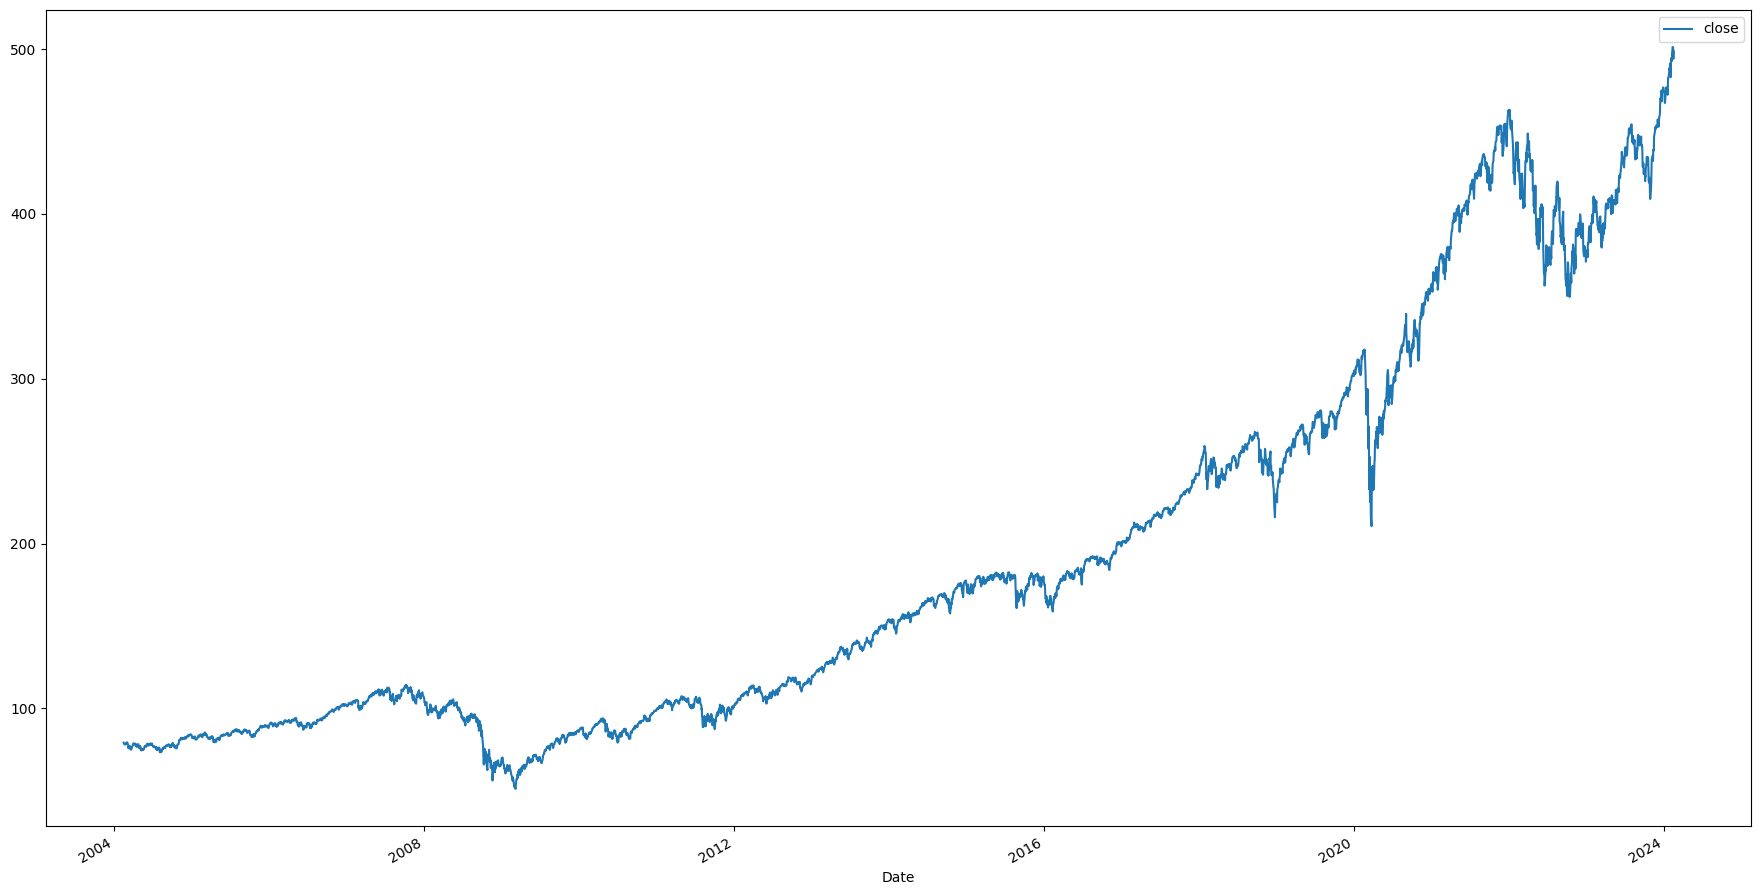

In [3]:
spy = SPY_open
spy.plot(figsize=(22,12), use_index=True)

In [4]:
x= spy.close.values # ndarray 
x_nested = x.reshape(-1,1)

## K-Means

<Figure size 1200x600 with 0 Axes>

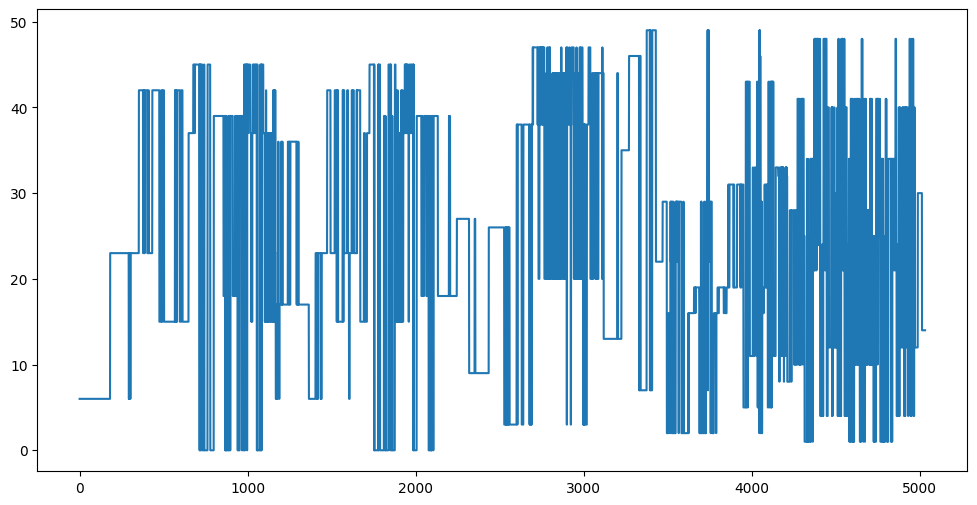

In [5]:
km = KMeans(50).fit(x_nested)
# plt.figure(figsize=(12,6))
# plt.plot(km.cluster_centers_)
# print(np.sort(km.cluster_centers_.reshape(1,-1)[0]))

plt.figure(figsize=(12,6))
plt.plot(range(spy.shape[0]),km.predict(x_nested))

## IsolationForest

In [6]:
clf = IsolationForest(max_samples='auto', contamination=.05, n_estimators=1000,
                      random_state=19117,  max_features=x_nested.shape[1]) #  added : behaviour='new'

#.025 , .22 ,.15 

model = clf.fit(x_nested)
p = model.predict(x_nested)

### Well this is useless 


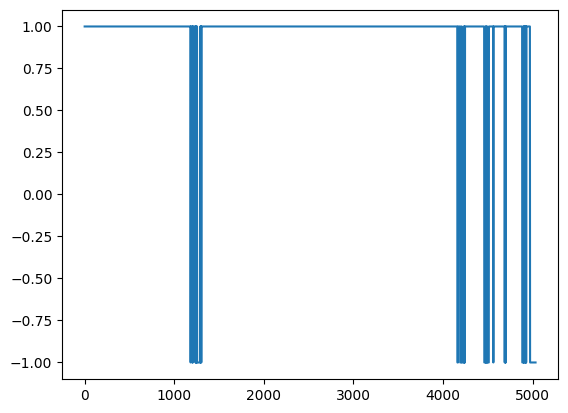

In [7]:
#plt.figure(figsize=(12,6))
plt.plot(p)

### Let's figure out how to plot it...


In [8]:
# p = p.reshape(1,-1)[0]
itemindex = np.where(p==-1)

<Figure size 2500x1200 with 0 Axes>

Text(0.5, 1.0, 'IsolationForest - S&P 500')

[]

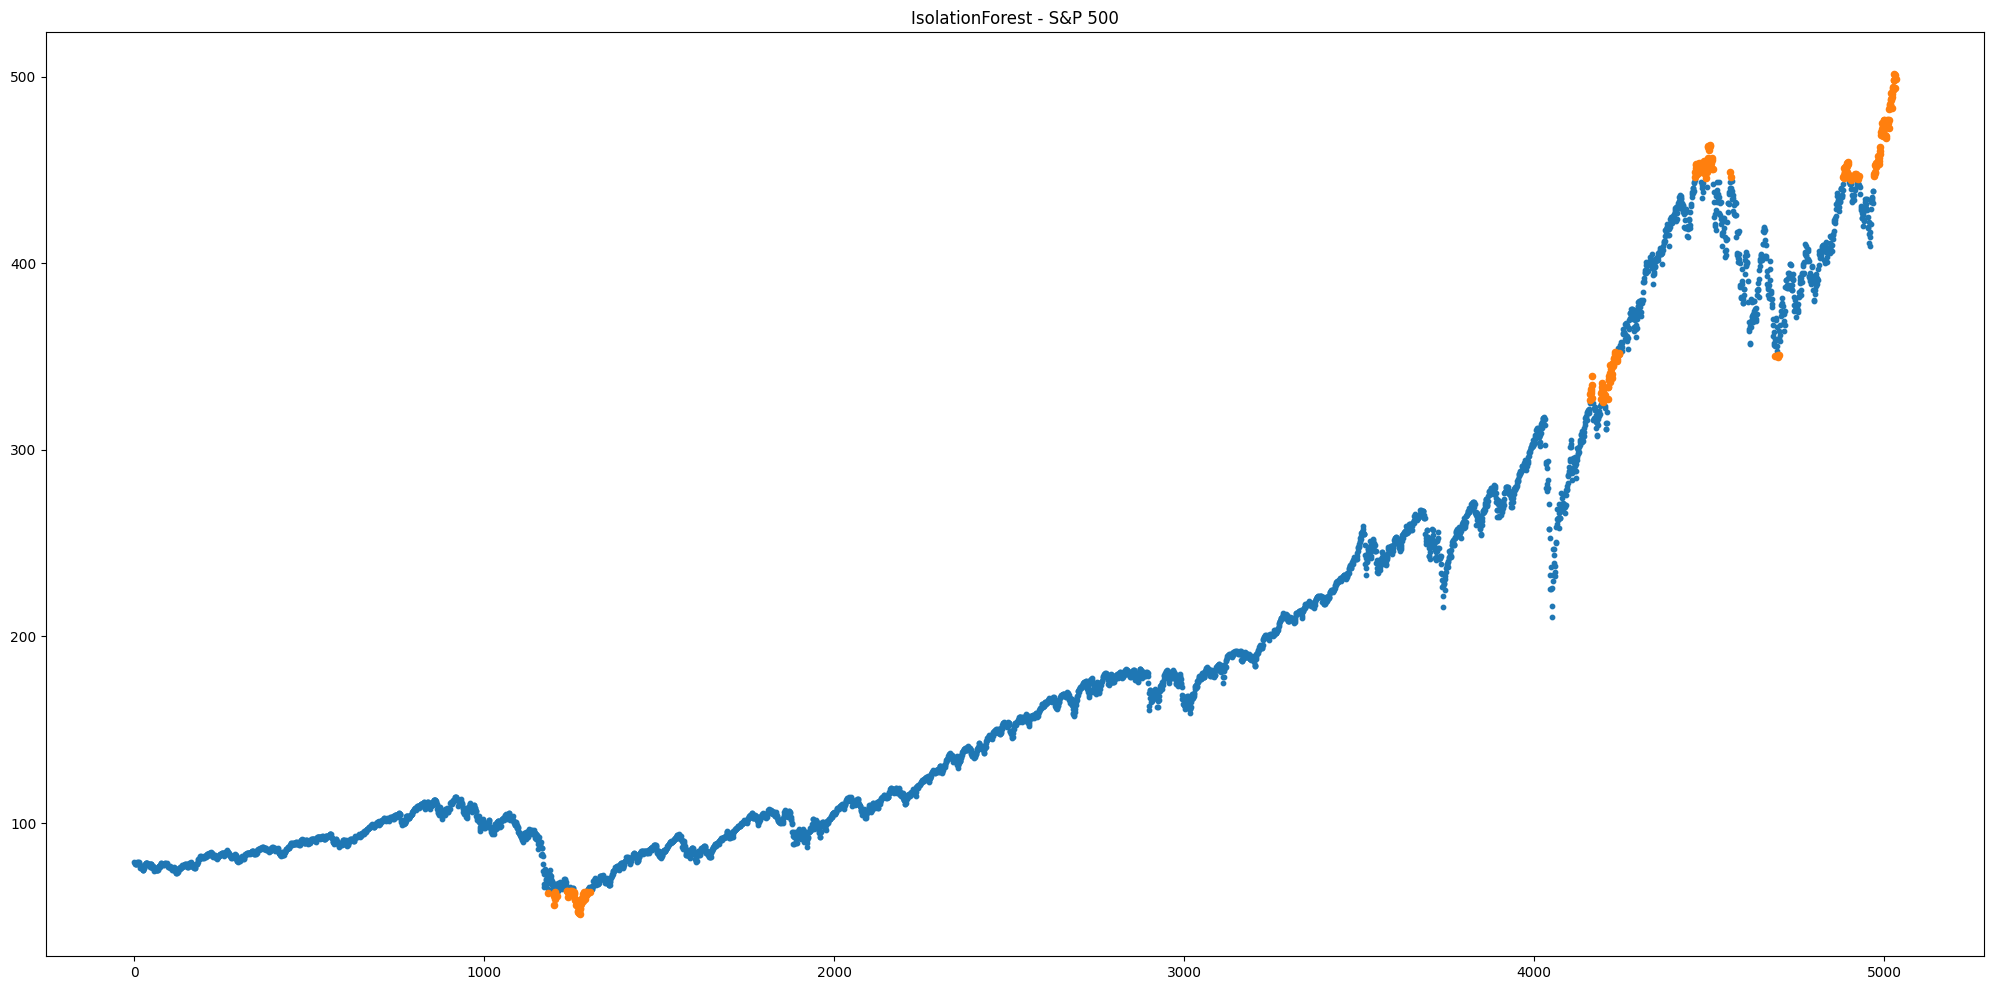

In [9]:
plt.figure(figsize=(25,12))
plt.title("IsolationForest - S&P 500")
x_axis = range(len(x))
out = plt.scatter(x_axis,y=x,s=10)
plt.scatter(itemindex, x[itemindex],s=20)
plt.plot()

In [10]:
# anomalies = pd.DataFrame({'x' :list(itemindex)[0],
#                         'y': x[itemindex]})
# anomalies.plot(x='x',y='y',figsize=(24,12), kind='scatter')

## Lets try GaussianMixture 

In [11]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=5)
gmm.fit(x_nested)

GaussianMixture(n_components=5)

In [12]:
pred = gmm.predict(x_nested)
pred_prob = gmm.predict_proba(x_nested)
scores= gmm.score_samples(x_nested)
scoresMean = scores.mean()

In [13]:
#print(pred[:1000])

In [14]:
itemindex = np.where(pred>0)

<Figure size 1200x600 with 0 Axes>

Text(0.5, 1.0, 'GaussianMixture - S&P 500')

[]

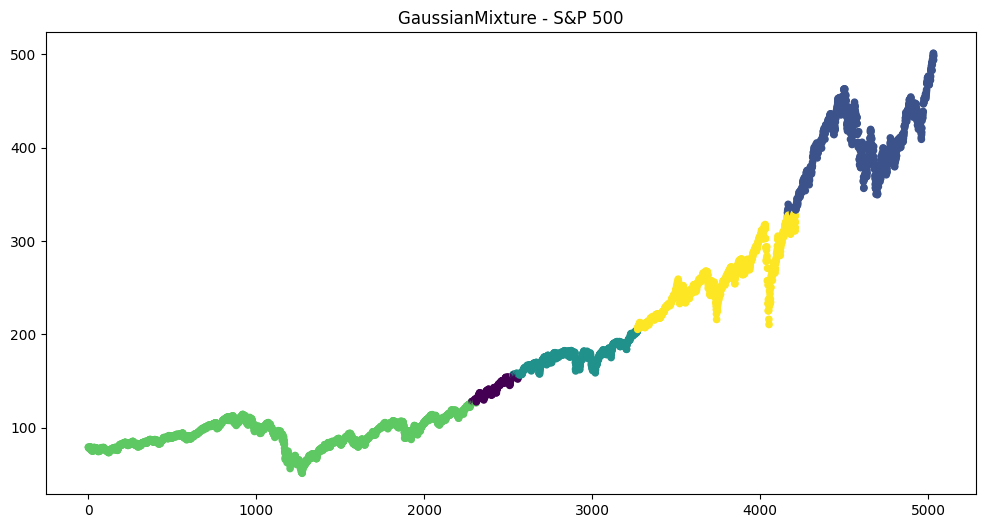

In [15]:
plt.figure(figsize=(12,6))
plt.title("GaussianMixture - S&P 500")
x_axis = range(len(x))
out = plt.scatter(x_axis,y=x,s=20,c=pred) # added c=pred
#plt.scatter(itemindex,x[itemindex],s=20,color='r') #

plt.plot()

This sames to be the worng algo for the job, let's move on..

## OK lets try `EllipticEnvelop`  

In [16]:
from sklearn.covariance import EllipticEnvelope
ev = EllipticEnvelope(contamination=.15)
ev.fit(x_nested)

EllipticEnvelope(contamination=0.15)

<Figure size 1200x600 with 0 Axes>

Text(0.5, 1.0, 'EllipticEnvelope - S&P 500')

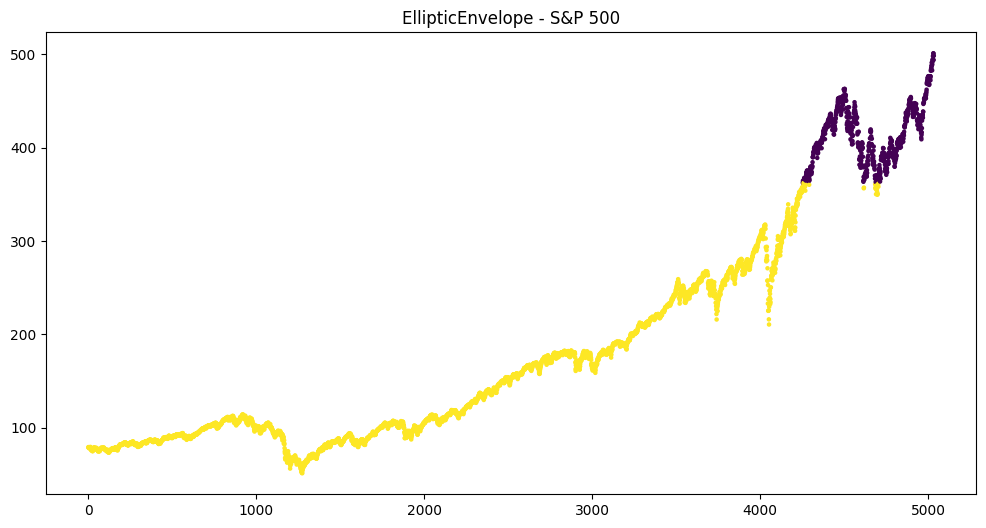

In [17]:
cluster = ev.predict(x_nested)

plt.figure(figsize=(12,6))
plt.title("EllipticEnvelope - S&P 500")
plt.scatter(range(len(x_nested)), x_nested, s=5, c=cluster)

well thats also useless... half the time, its just the top n%

## Let's try `OneClassSVM`

In [18]:
from sklearn.svm import OneClassSVM
svm = OneClassSVM(degree=5)
svm.fit(x_nested)
pred = svm.predict(x_nested)

OneClassSVM(degree=5)

In [19]:
arry = pred.reshape(1,-1)[0]
itemindex = np.where(arry==-1)
print('len of arry:      ',len(arry))
print('len of itemindex: ',len(itemindex[0]))

len of arry:       5034
len of itemindex:  2518


<Figure size 2400x1200 with 0 Axes>

Text(0.5, 1.0, 'OneClassSVM - S&P 500')

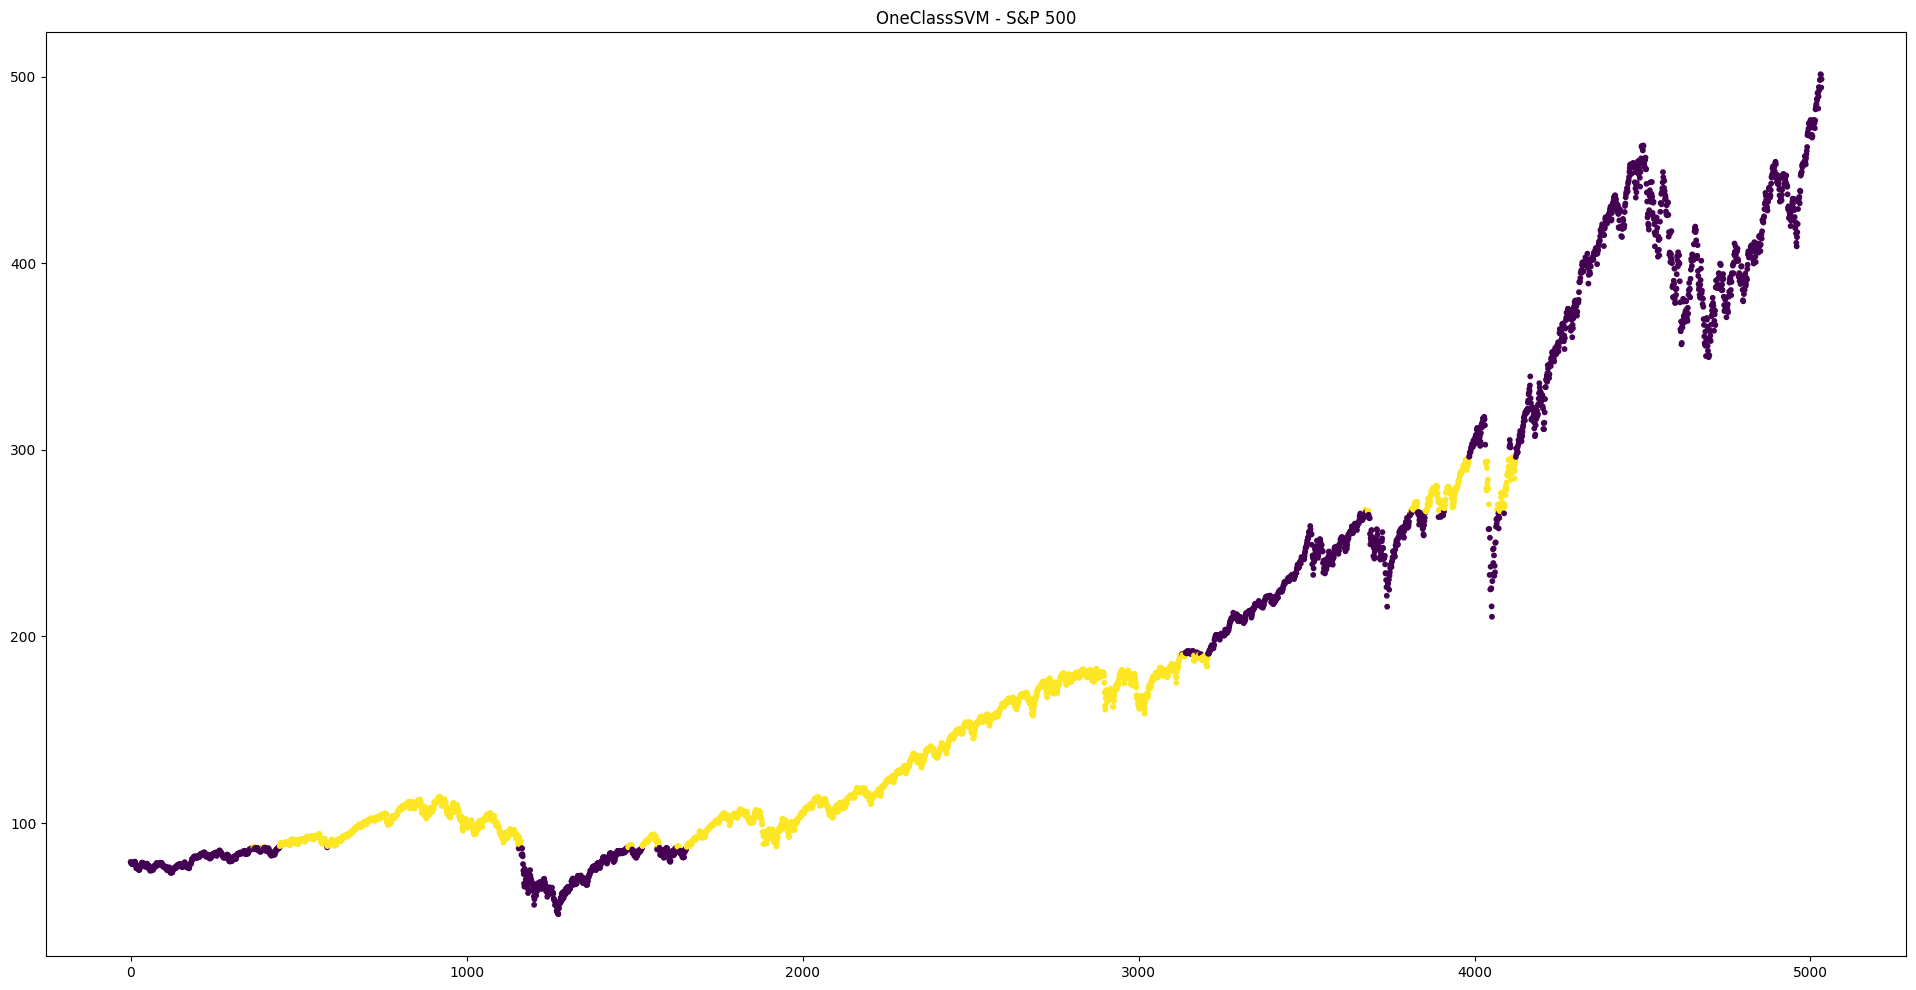

In [20]:
plt.figure(figsize=(24,12))
plt.title("OneClassSVM - S&P 500")
plt.scatter(range(len(x_nested)), x_nested,s=10,c=pred)

<Figure size 2400x1200 with 0 Axes>

Text(0.5, 1.0, 'OneClassSVM - S&P 500')

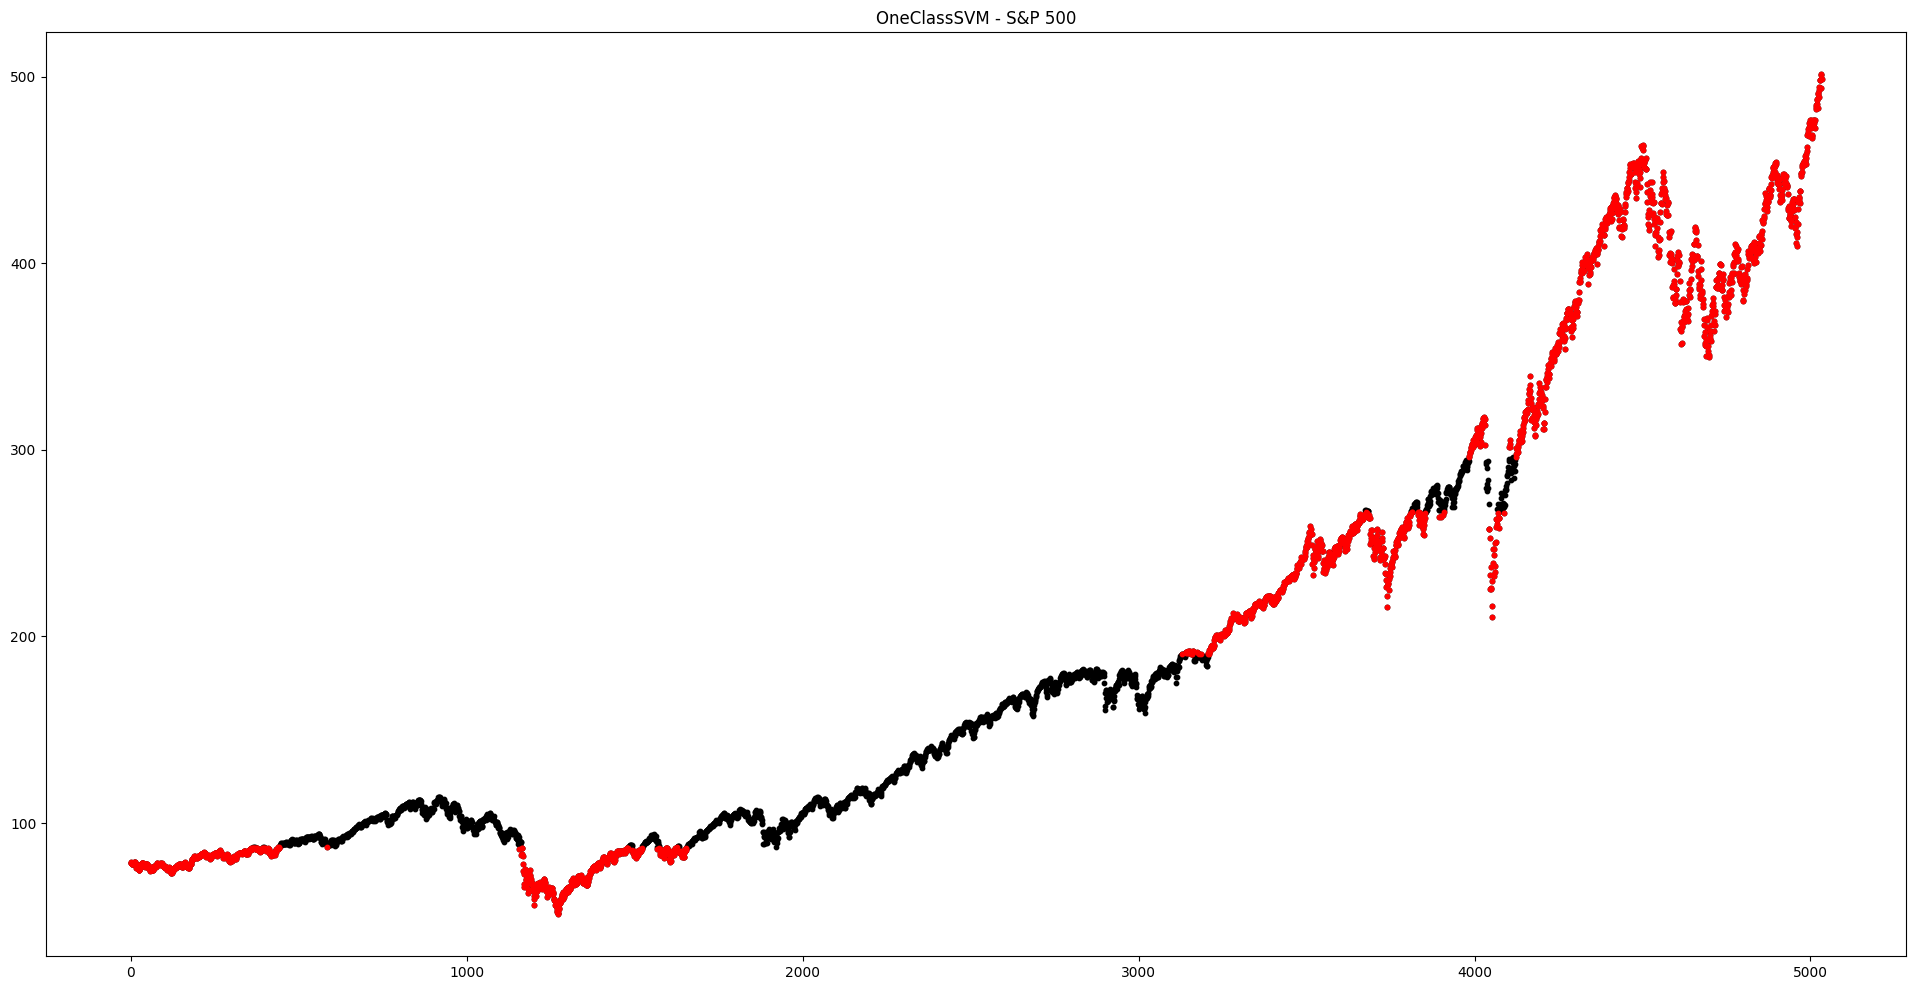

In [21]:
plt.figure(figsize=(24,12))
plt.title("OneClassSVM - S&P 500")
plt.scatter(range(len(x_nested)), x_nested,s=10,c='k')
plt.scatter(itemindex,x[itemindex],s=10,color='r') #

## Let's try `LocalOutLierFactor`

In [22]:
from sklearn.neighbors import LocalOutlierFactor

lof = LocalOutlierFactor(n_neighbors=20, algorithm='auto', leaf_size=40, contamination ='auto') 
pred = lof.fit_predict(x_nested)

arry = pred.reshape(1,-1)[0]
itemindex = np.where(arry==-1)
print('len of arry:      ',len(arry))
print('len of itemindex: ',len(itemindex[0]))

len of arry:       5034
len of itemindex:  58


<Figure size 2400x1200 with 0 Axes>

Text(0.5, 1.0, 'LocalOutlierFactor - S&P 500')

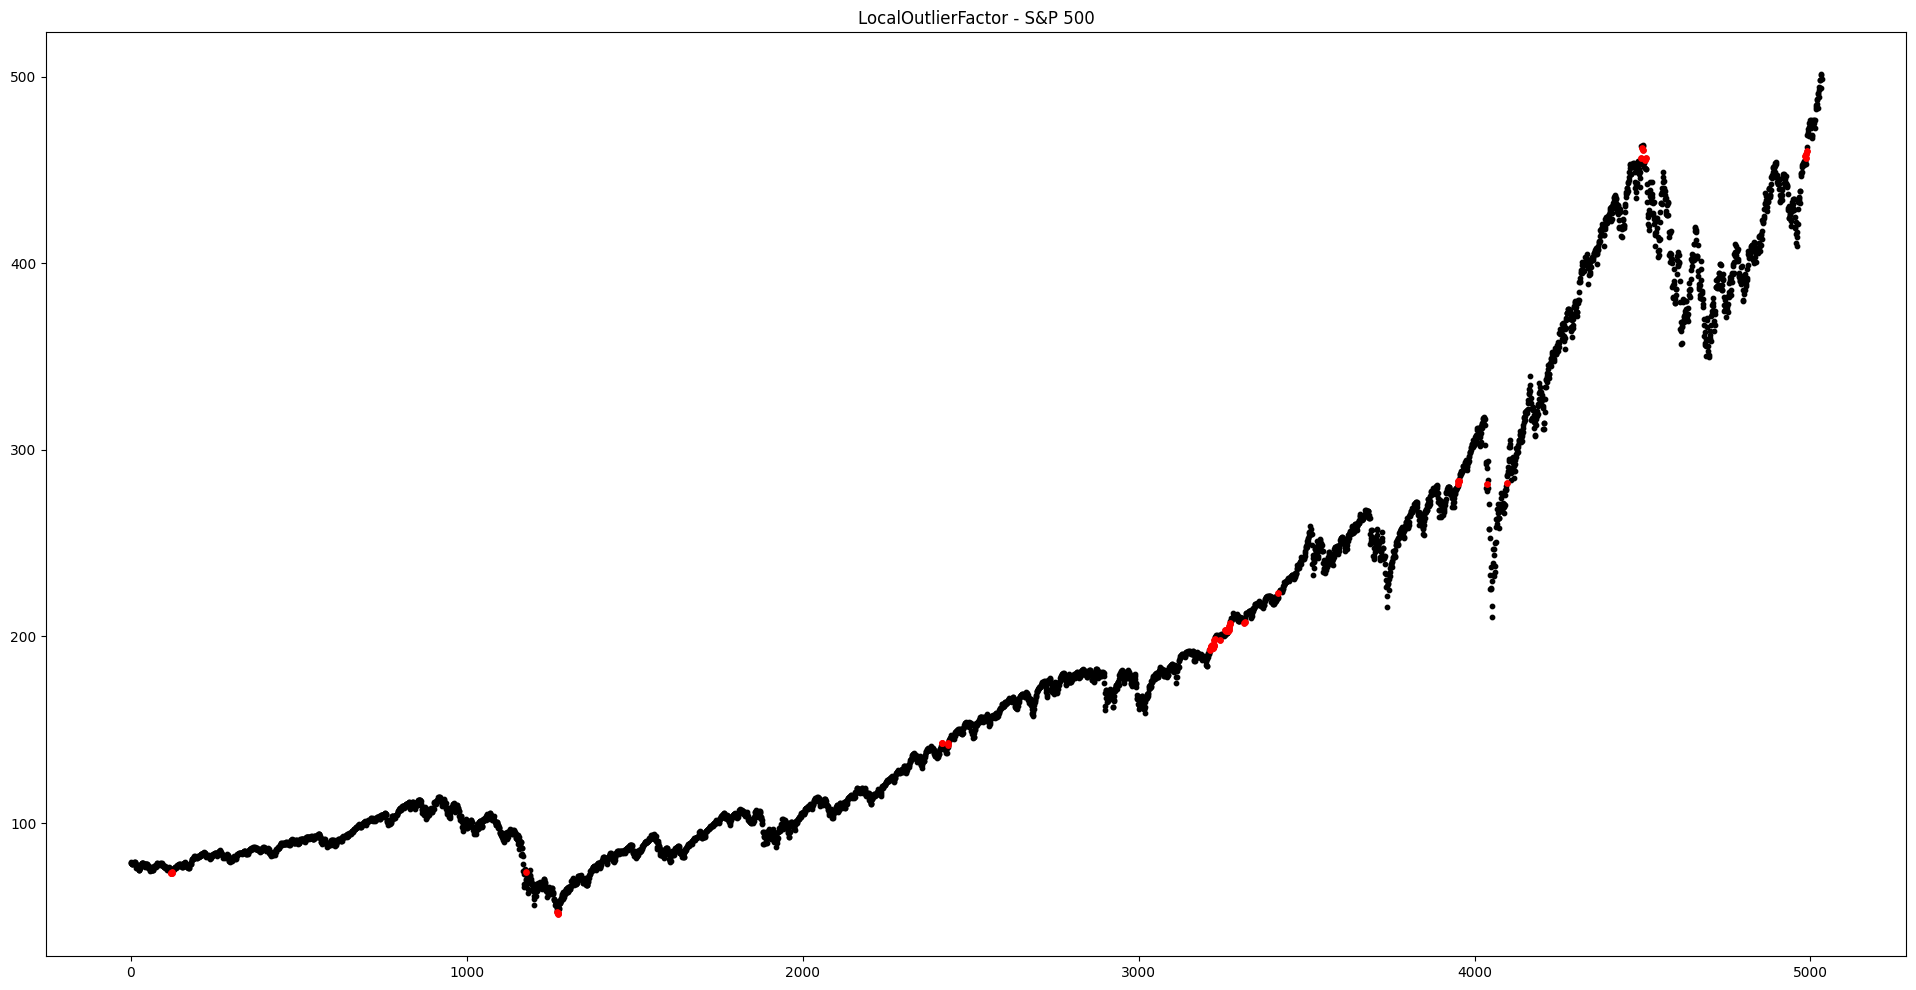

In [23]:
plt.figure(figsize=(24,12))
plt.title("LocalOutlierFactor - S&P 500")
plt.scatter(range(len(x_nested)), x_nested, s=10, c='k')
plt.scatter(itemindex,x[itemindex], s=15, color='r') #

len of arry:       5034
len of itemindex:  252


<Figure size 2400x1200 with 0 Axes>

Text(0.5, 1.0, 'LocalOutlierFactor - S&P 500')

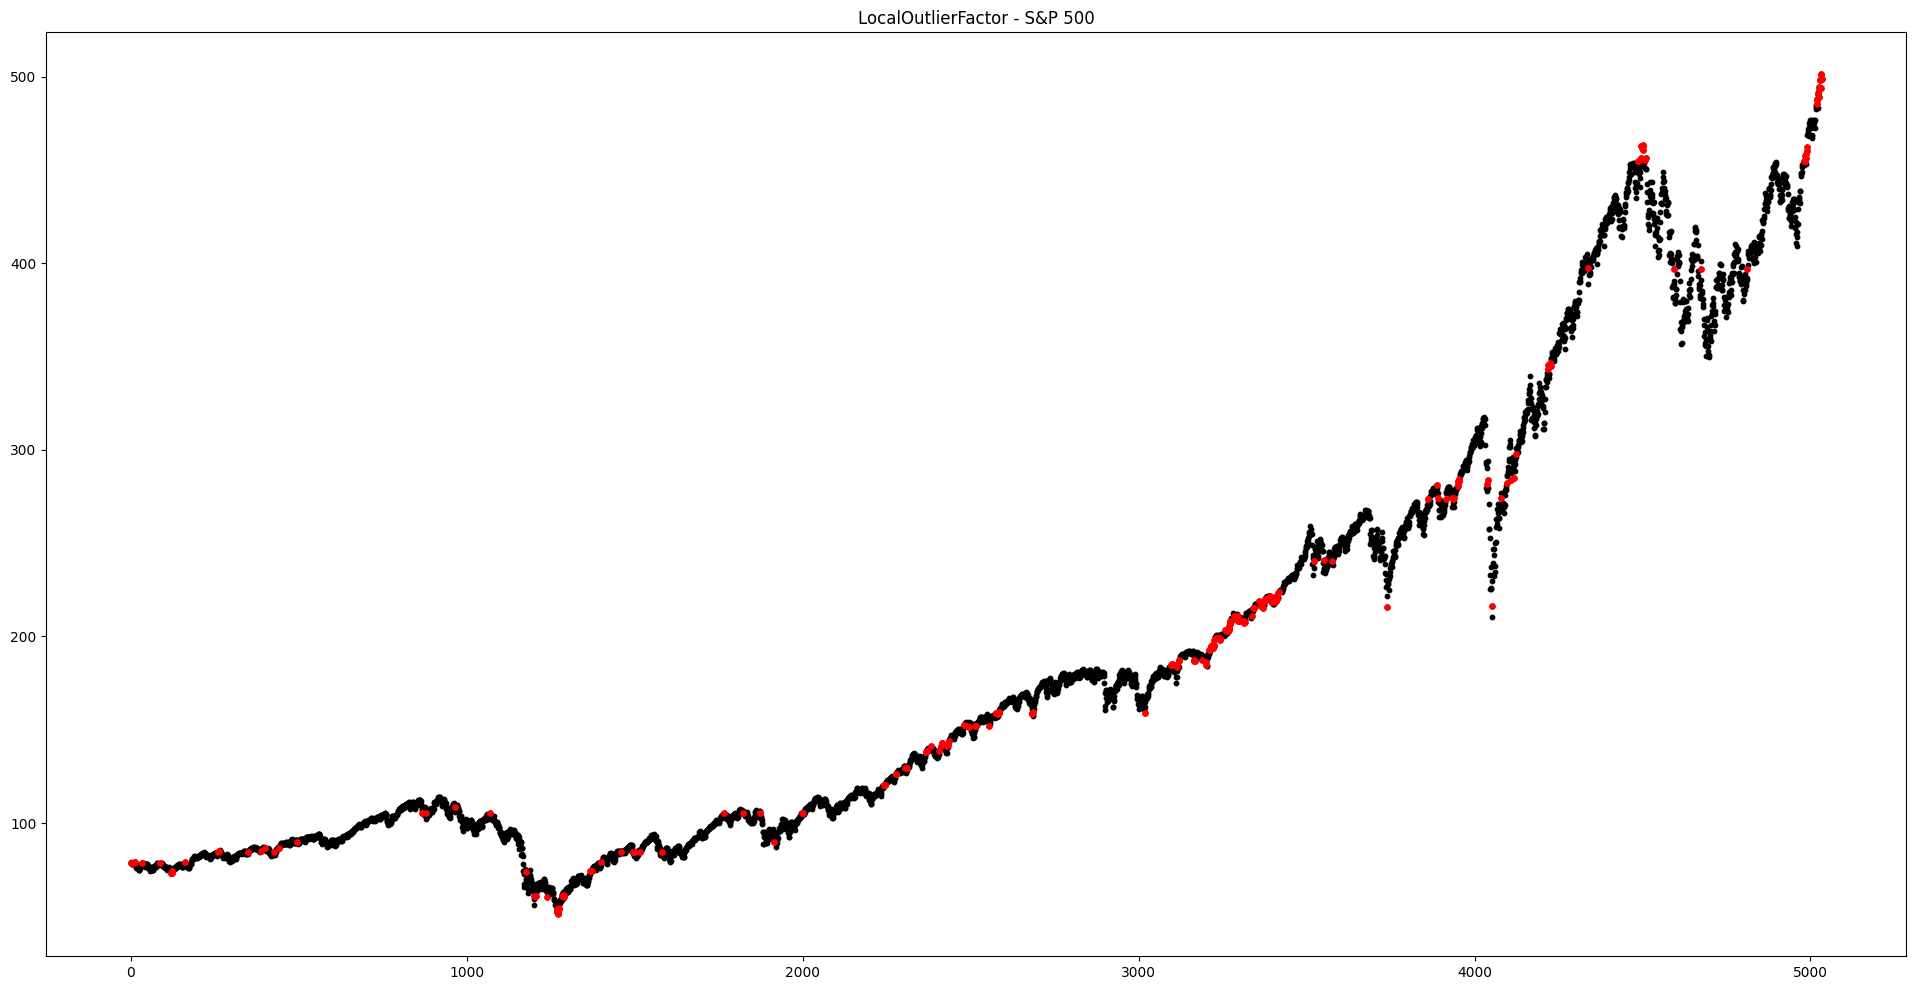

In [24]:
lof = LocalOutlierFactor(n_neighbors=20,algorithm='auto', leaf_size=40, contamination =0.05) # changed contamination
pred = lof.fit_predict(x_nested)

arry = pred.reshape(1,-1)[0]
itemindex = np.where(arry==-1)
print('len of arry:      ',len(arry))
print('len of itemindex: ',len(itemindex[0]))

plt.figure(figsize=(24,12))
plt.title("LocalOutlierFactor - S&P 500")
plt.scatter(range(len(x_nested)), x_nested, s=10, c='k')
plt.scatter(itemindex,x[itemindex],s=15,color='r') #

In [25]:
'''
The opposite LOF of the training samples. The higher, the more normal. Inliers tend to have a LOF score close to 1 (negative_outlier_factor_ close to -1), while outliers tend to have a larger LOF score.

'''
NOF = lof.negative_outlier_factor_
print(NOF)

'\nThe opposite LOF of the training samples. The higher, the more normal. Inliers tend to have a LOF score close to 1 (negative_outlier_factor_ close to -1), while outliers tend to have a larger LOF score.\n\n'

[-1.13022803 -1.25211    -1.07720275 ... -1.49241397 -1.30322665
 -1.41401429]


In [26]:
NOF = np.abs( NOF + 1)
NOF_sorted = np.argsort(NOF)
NOF_sorted = NOF_sorted[::-1]
numb_wanted = round(NOF_sorted.shape[0] * 0.05)
contaminated = NOF_sorted[:numb_wanted]
print(contaminated)

[4983 3224 4501 3416 3220 4989 3217 3216 4509 3219 3221 4988 3953 4987
 3225 3218 4096 3215 3271 3955 3952 4496 3269 4500 2414 1273 3226 3222
 2415 3242 4038 3223 3951 2434 3313 3258 1271 1272 3213 3272 3270  124
  119  123 3265 3259 1178  120 3227 3268 2432 4508 3260 3267 1269 3266
 3316 3214 5030 3377 2416 3343 5031 3370 3376 3342 3300 1268  495 3378
 3274 3296 3403 3120 2577 1915 4497 3409 5033 5029 2435 4498 4990 3299
 5028 3315 3740 3273 2407 3412 4108  867 3954 3211 4040 3241 3201 4984
 3167 3312 3298 2584 3344 2367 3240 3937 2369 2556 2576 3862 2277 3275
 1270 2489 3933 3940 2431 3166 4985 4502 3364 2413 1284 3887 1874 4503
 2684 3396 2514 4499 3366 3099 1274 1071 3231 3164 3345 3018 4051 1240
 2370 5025 4487 4219 2243 1200 1824 5032 1401 4338 5027 3891 2515 2241
 3100 2242 2244 3863 1275 3408 2366 2245 1766 4218 3297 2278 1582 3110
 3419 3417 3202 5020 2382 3098   11 4225 3914 5026 3375 2481 2687 3374
 5019 2002  878 4079 1207 3121 4227 4595 3294   12 3405  348 3358 1515
  161 

<Figure size 2400x1200 with 0 Axes>

Text(0.5, 1.0, 'LocalOutlierFactor - S&P 500')

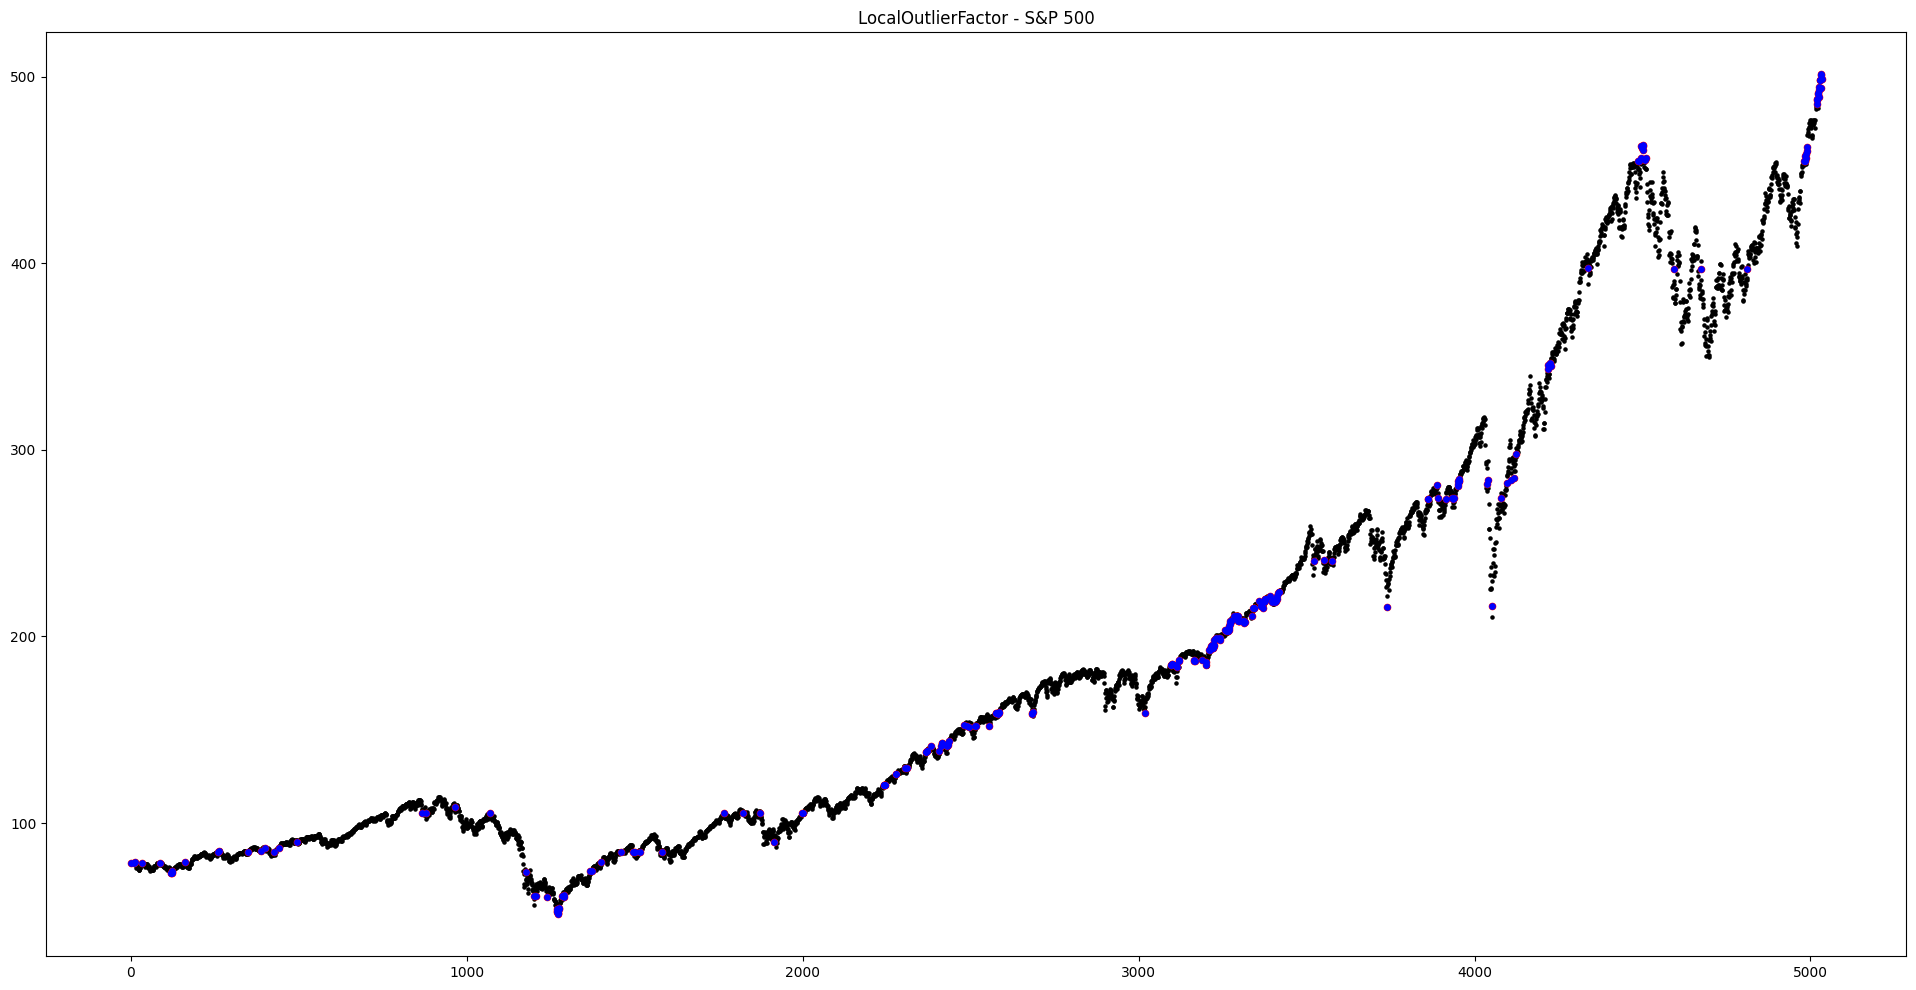

In [27]:
plt.figure(figsize=(24,12))
plt.title("LocalOutlierFactor - S&P 500")
plt.scatter(range(len(x_nested)), x_nested, s=5, c='k', label = "data")
plt.scatter(itemindex,x[itemindex], s=20, color='r', label='AD via predict') #
plt.scatter(contaminated,x_nested[contaminated], s=15, color='b', label = "AD via negative_outlier_factor_") #

# so IsolationForest, and LocalOutlierFactor are the best

## Let's try DBscan

 tune eps to get  < 3% in itemindex (number of anomalies) 

In [28]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=.55,leaf_size=500)

pred = dbscan.fit_predict(x_nested)
pred = pred.reshape(1,-1)[0]
itemindex = np.where(arry==-1)

print('\nlen of pred:      ',len(pred))
print('len of itemindex: ',len(itemindex[0]))
arry


len of pred:       5034
len of itemindex:  252


array([ 1, -1,  1, ..., -1, -1, -1])

**NOISY SAMPLES**

<Figure size 1600x600 with 0 Axes>

Text(0.5, 1.0, 'DBSCAN NOISY SAMPLES - S&P 500')

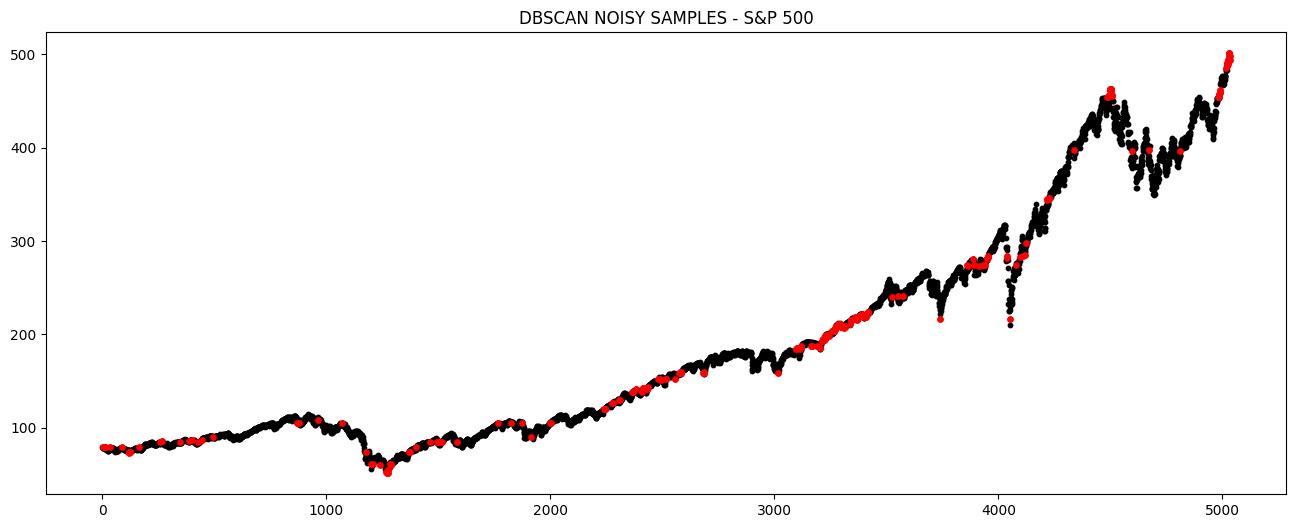

In [29]:
plt.figure(figsize=(16,6))
plt.title("DBSCAN NOISY SAMPLES - S&P 500")
plt.scatter(range(len(x_nested)), x_nested,s=10,c='k')
plt.scatter(itemindex,x[itemindex], s=15, color='r') #

Text(0.5, 1.0, 'DBSCAN - S&P 500')

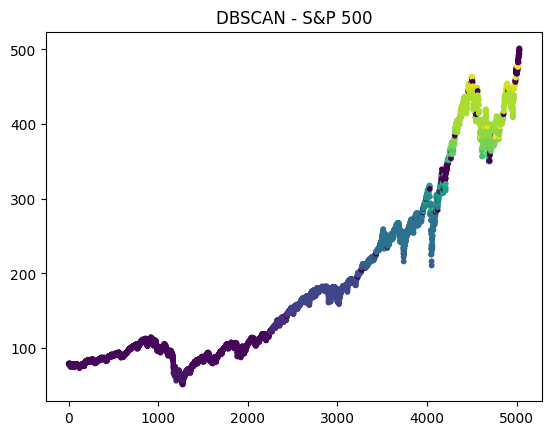

In [30]:
#plt.figure(figsize=(24,12))
plt.title("DBSCAN - S&P 500")
plt.scatter(range(len(x_nested)), x_nested, s=10, c=dbscan.labels_)

In [31]:
x_nested
from collections import Counter
# print(Counter(dbscan.labels_))

array([[ 79.23516846],
       [ 78.88731384],
       [ 78.59400177],
       ...,
       [500.98001099],
       [494.07998657],
       [498.57000732]])

In [32]:
print(len(set(dbscan.labels_)), "clusters....")

65 clusters....


# let's try using pyod

[Implemented Algorithms](https://github.com/yzhao062/pyod#implemented-algorithms)

In [33]:
import gc 
gc.collect()
# !pip install pyod

3343


len of arry:     5034
len of itemindex:  252


c:\Users\alik604\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function fit_predict is deprecated
  warnings.warn(msg, category=FutureWarning)


<Figure size 1600x400 with 0 Axes>

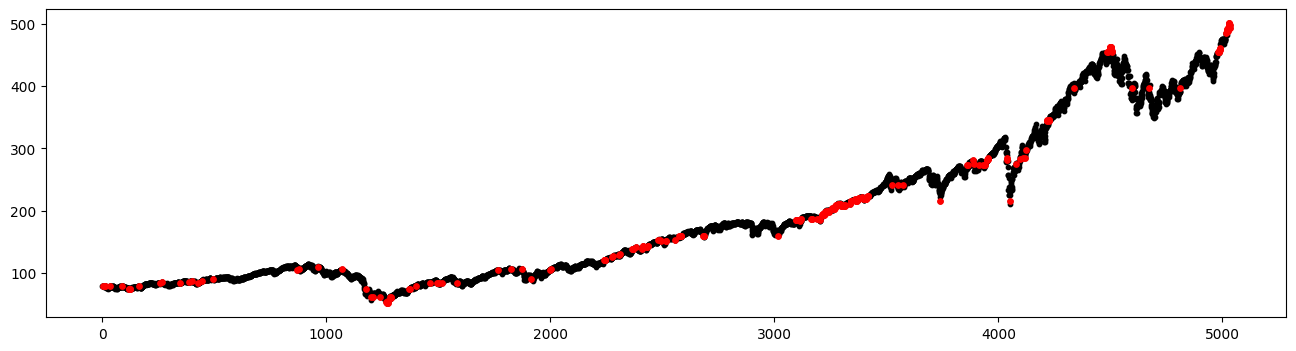

In [34]:
from pyod.models.knn import KNN
from pyod.models.iforest import IForest
from pyod.models.lof import LOF
# from pyod.models.auto_encoder import AutoEncoder
from pyod.models.abod import ABOD

lof= LOF(contamination=0.05)
pred=lof.fit_predict(x_nested)
arry = pred.reshape(1,-1)[0]
itemindex = np.where(arry==1)

print('\nlen of arry:    ',len(arry))
print('len of itemindex: ',len(itemindex[0]))

plt.figure(figsize=(16,4))
plt.scatter(range(len(x_nested)), x_nested,s=10,c='k')
plt.scatter(itemindex,x[itemindex], s=15, color='r')

c:\Users\alik604\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function fit_predict is deprecated
  warnings.warn(msg, category=FutureWarning)


<Figure size 1600x400 with 0 Axes>

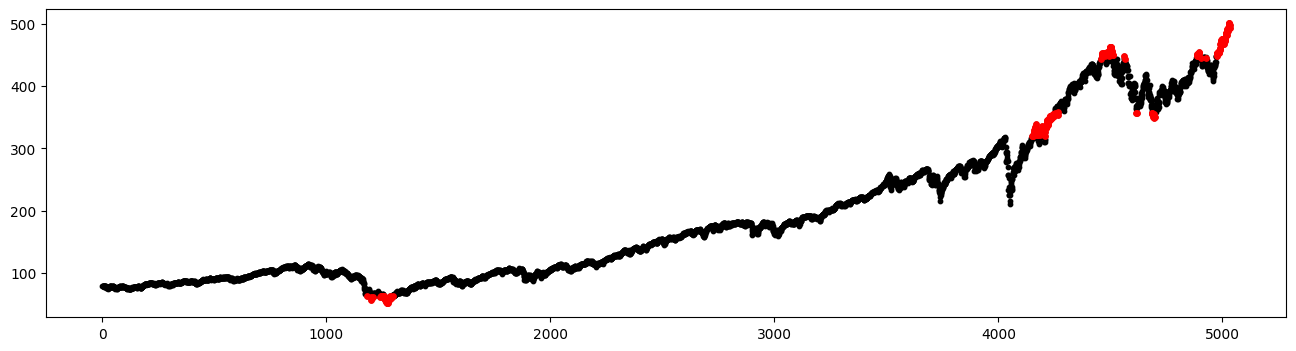

In [35]:
iforest= IForest(contamination=0.05)
pred=iforest.fit_predict(x_nested)
arry = pred.reshape(1,-1)[0]
itemindex = np.where(arry==1)

plt.figure(figsize=(16,4))
plt.scatter(range(len(x_nested)), x_nested,s=10,c='k')
plt.scatter(itemindex,x[itemindex], s=15, color='r')